In [1]:
import pandas as pd
import numpy as num
arquivo = pd.read_csv("Dados_Graduacao.csv")
display(arquivo)

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902671,163,UNIVERSIDADE ESTÁCIO DE SÁ,Privada com fins lucrativos,Universidade,1518220,CIÊNCIA DE DADOS,Tecnológico,NaN,Educação a Distância,Em atividade,2589,2086,456,Ciência de dados,4300604,Alvorada,RS,SUL
902672,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1468267,MÚSICA,Licenciatura,Formação de professor de música,Educação a Distância,Em atividade,1700,3992,42,Formação de professor de música,2704302,Maceió,AL,NORDESTE
902673,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1185929,CIÊNCIAS CONTÁBEIS,Bacharelado,Ciências contábeis,Educação a Distância,Em atividade,4500,3260,138,Ciências contábeis,3554003,Tatuí,SP,SUDESTE
902674,298,Universidade Pitágoras Unopar Anhanguera,Privada com fins lucrativos,Universidade,97329,MARKETING,Tecnológico,NaN,Educação a Distância,Em atividade,6000,1700,158,Marketing,2601102,Araripina,PE,NORDESTE


1 - Calculando o número de vagas por Região.

REGIAO
CENTRO-OESTE          620100529
IGNORADO/EXTERIOR       5854628
NORDESTE             1218963125
NORTE                 637651691
SUDESTE              2333028227
SUL                   944563809
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

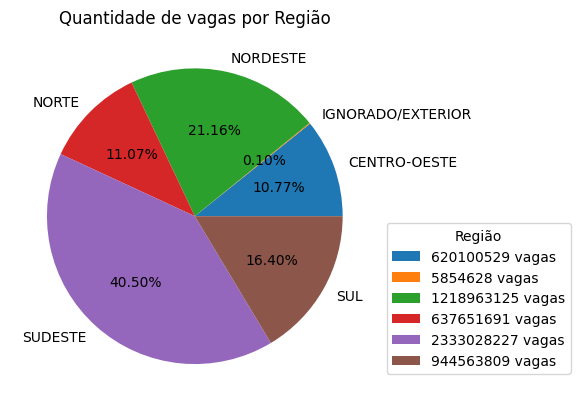

In [2]:
vagas_por_regiao = arquivo.groupby('REGIAO')['QT_VAGAS_AUTORIZADAS'].sum()

display(vagas_por_regiao)

import matplotlib.pyplot as plt
regiao = vagas_por_regiao.index
vagas = vagas_por_regiao.values

plt.title("Quantidade de vagas por Região")
plt.pie(vagas, labels=regiao, autopct='%1.2f%%')
plt.legend([f'{vag} vagas' for reg, vag in zip(regiao, vagas)], 
           title="Região", loc="best", bbox_to_anchor=(1, 0.5))

plt.savefig("Gráfico_Vagas_Regiao.png", bbox_inches='tight')
plt.show()

A partir da análise inicial, nota-se uma disparidade significativa na distribuição de vagas disponíveis entre as diferentes regiões do país, com uma concentração maior nas áreas de maior desenvolvimento econômico. Isso resulta em um investimento mais robusto na educação, tanto por instituições privadas quanto públicas.

2 - Calculando a modalidade mais escolhida

MODALIDADE
Educação Presencial        8778720
Educação a Distância    5751383289
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

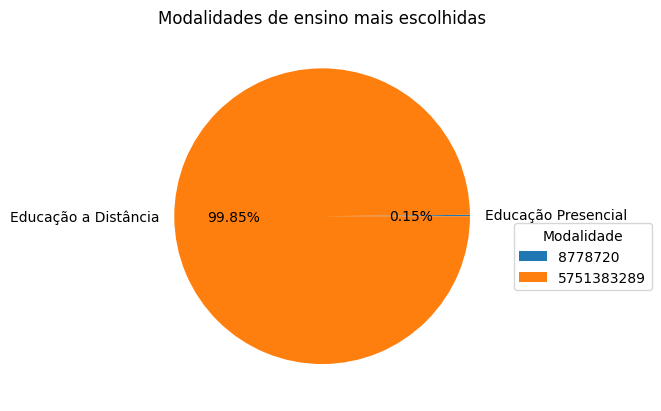

In [3]:
vagas_por_modalidade = arquivo.groupby('MODALIDADE')['QT_VAGAS_AUTORIZADAS'].sum()
display(vagas_por_modalidade)

modalidade = vagas_por_modalidade.index
vagas_modal = vagas_por_modalidade.values

plt.title("Modalidades de ensino mais escolhidas")
plt.pie(vagas_modal, labels=modalidade, autopct='%1.2f%%')

# plt.legend(modalidade, title="Modalidade", loc="best", bbox_to_anchor=(1, 0.5))
plt.legend([f'{vagas}' for mod, vagas in zip(modalidade, vagas_modal)], title="Modalidade", loc="best", bbox_to_anchor=(1, 0.5))

plt.savefig("Gráfico_Modalidades.png", bbox_inches='tight')
plt.show()

A educação à distância tem mostrado uma clara predominância no número de vagas, especialmente após a pandemia. Essa modalidade se tornou a escolha preferida da população devido à sua maior flexibilidade de horários e, em geral, por ser mais acessível para pessoas de baixa renda, já que elimina custos adicionais, como transporte.

3 - Tipos de Instituições mais escolhidas

CATEGORIA_ADMINISTRATIVA
Especial                           220864
Privada com fins lucrativos    5650874747
Privada sem fins lucrativos      96356987
Pública Estadual                  5746693
Pública Federal                   2293245
Pública Municipal                 4669473
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

C:\Users\Rogin\AppData\Local\Temp\ipykernel_8872\2005064361.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Especial', 'Priv c/ fins \nlucrativos', 'Priv s/ fins \nlucrativos', 'Pública Est', 'Pública Fed', 'Pública Mun'])


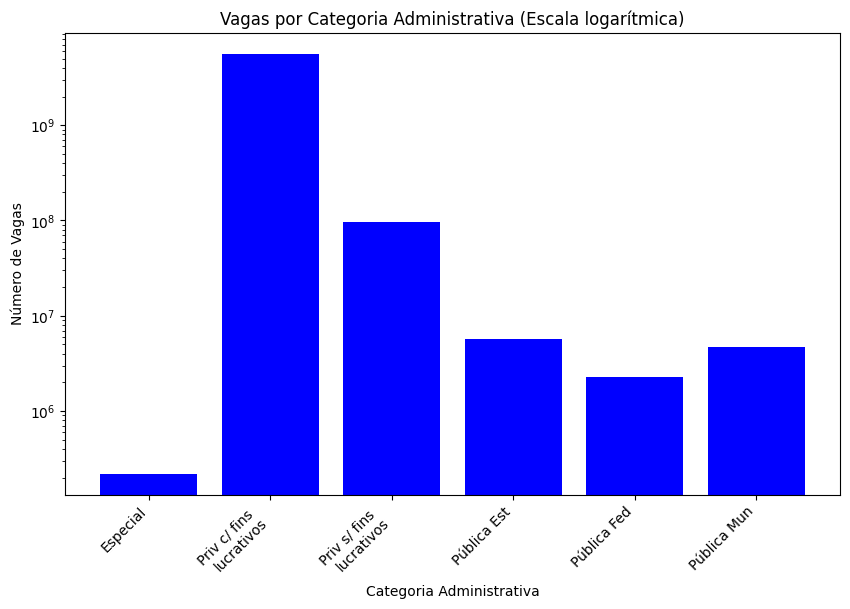

In [4]:
vagas_por_inst = arquivo.groupby('CATEGORIA_ADMINISTRATIVA')['QT_VAGAS_AUTORIZADAS'].sum()
display(vagas_por_inst)

inst = vagas_por_inst.index
vagas_inst = vagas_por_inst.values

plt.figure(figsize=(10, 6))
plt.bar(inst, vagas_inst, color='blue')

plt.title('Vagas por Categoria Administrativa (Escala logarítmica)')
plt.xlabel('Categoria Administrativa')
plt.ylabel('Número de Vagas')

plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Especial', 'Priv c/ fins \nlucrativos', 'Priv s/ fins \nlucrativos', 'Pública Est', 'Pública Fed', 'Pública Mun'])

plt.savefig("Gráfico_Cat_Admin.png", bbox_inches='tight')

plt.show()

Podemos observar que a maioria da população opta por ingressar em instituições privadas, com ou sem fins lucrativos. Isso ocorre principalmente devido à alta concorrência por vagas em instituições públicas, o que diminui consideravelmente as chances de ingresso. Muitas pessoas, especialmente aquelas que precisam trabalhar para se sustentar ou apoiar suas famílias, não conseguem dedicar tempo suficiente aos estudos para competir por vagas tão disputadas.

4 - Graus de ensino mais escolhidos


GRAU
Bacharelado                      1551091974
Licenciatura                     1304494277
Sequencial                            86806
Tecnológico                      2904488237
Área Básica de Ingresso (ABI)           715
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

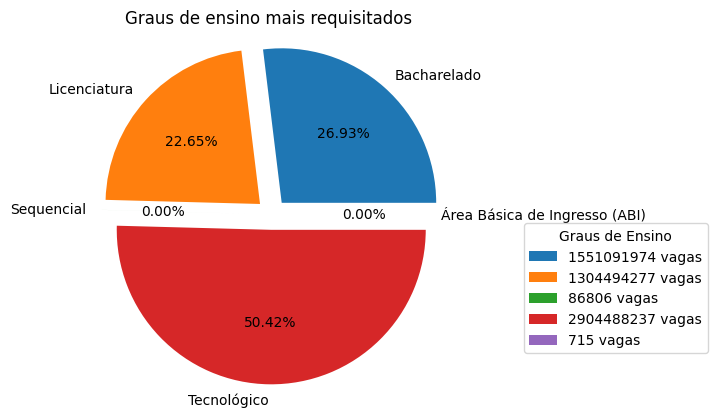

In [5]:
grau = arquivo.groupby('GRAU')['QT_VAGAS_AUTORIZADAS'].sum()
display(grau)

grau_nome = grau.index
vagas_grau = grau.values

explode = (0.1, 0.1, 0.1, 0.1, 0)

plt.title("Graus de ensino mais requisitados")
plt.pie(vagas_grau, explode=explode, labels=grau_nome, autopct='%1.2f%%')

plt.legend([f'{vagas} vagas' for grau, vagas in zip(grau_nome, vagas_grau)], 
           title="Graus de Ensino", loc="best", bbox_to_anchor=(1, 0.5))

plt.axis('equal')

plt.savefig("Gráfico_Graus_Ensino.png", bbox_inches='tight')

plt.show()

Por fim, um aspecto interessante destacado neste estudo é a preferência pelos cursos de grau "Tecnólogo". Essa escolha parece estar relacionada à necessidade de a maior parte da população ingressar rapidamente no mercado de trabalho, uma vez que esses cursos, com duração média de 2 a 3 anos, oferecem essa possibilidade.